In [2]:
import os
import configparser
data_path = "dataset"
set_list = os.listdir(data_path)
set_list.sort()
i = 0
while i < len(set_list):
    try:
        int(set_list[i])
        i += 1
    except:
        set_list.pop(i)
set_list

['1', '19', '4', '51']

In [3]:
name = []
imDir = []
frameRate = []
seqLength = []
imWidth = []
imHeight = []
imExt = []
isharbor = []
isdeparture = []
isentering = []
issea = []
isfog = []
isstrongbacklit = []
for idx in set_list:
    try:
        int(idx)
    except:
        continue
    info_path = os.path.join(data_path,idx,'seqinfo.ini')
    config = configparser.ConfigParser() # 类实例化
    config.read(info_path)
    name.append(config.get('Sequence','name'))
    imDir.append(config.getint('Sequence','imDir'))
    frameRate.append(config.getint('Sequence','frameRate'))
    seqLength.append(config.getint('Sequence','seqLength'))
    imWidth.append(config.getint('Sequence','imWidth'))
    imHeight.append(config.getint('Sequence','imHeight'))
    imExt.append(config.get('Sequence','imExt'))
    isharbor.append(config.getint('Sequence','isharbor'))
    isdeparture.append(config.getint('Sequence','isdeparture'))
    isentering.append(config.getint('Sequence','isentering'))
    issea.append(config.getint('Sequence','issea'))
    isfog.append(config.getint('Sequence','isfog'))
    isstrongbacklit.append(config.getint('Sequence','isstrongbacklit'))

In [4]:
siz = []
for i in range(len(imWidth)):
    siz.append([imWidth[i],imHeight[i]])
siz.sort(reverse=True)
sizset = []
siznum = []
for i in siz:
    if i not in sizset:
        sizset.append(i)
        siznum.append(1)
    else:
        siznum[-1] += 1
print(sizset)
print(siznum)

[[1920, 1080], [1920, 720], [1920, 640]]
[2, 1, 1]


In [5]:
from collections import Counter

In [6]:
Counter(frameRate)

Counter({1: 3, 5: 1})

In [7]:
print(Counter(seqLength))
print(sum(seqLength)/len(seqLength))

Counter({300: 2, 220: 1, 1500: 1})
580.0


In [8]:
print(sum(isharbor))
print([imDir[i] for i,c in enumerate(isharbor) if c==1])

1
[1]


In [9]:
print(sum(isdeparture))
print([imDir[i] for i,c in enumerate(isdeparture) if c==1])

1
[4]


In [10]:
print(sum(isentering))
print([imDir[i] for i,c in enumerate(isentering) if c==1])

1
[19]


In [11]:
print(sum(issea))
print([imDir[i] for i,c in enumerate(issea) if c==1])

1
[51]


In [12]:
print(sum(isfog))
print([imDir[i] for i,c in enumerate(isfog) if c==1])

0
[]


In [13]:
print(sum(isstrongbacklit))
print([imDir[i] for i,c in enumerate(isstrongbacklit) if c==1])

0
[]


In [14]:
width_list = []
height_list = []
area_list = []
masked_list = []
line_list = list()
for data_id in set_list:
    label_path = os.path.join(data_path,data_id,'det','det.txt')
    with open(label_path,'r') as f:
        wordlist = f.readlines()
        for line in wordlist:
            if len(line.strip('\n')) == 0:
                continue
            line_list = [*map(lambda x: int(x), line.strip().split(','))]
            width_list.append(line_list[4])
            height_list.append(line_list[5])
            area_list.append(line_list[4]*line_list[5])
            masked_list.append(line_list[8])
    f.close()

In [15]:
Counter(masked_list)

Counter({0: 13912, 1: 1043, 2: 321})

In [16]:
from matplotlib import pyplot as plt

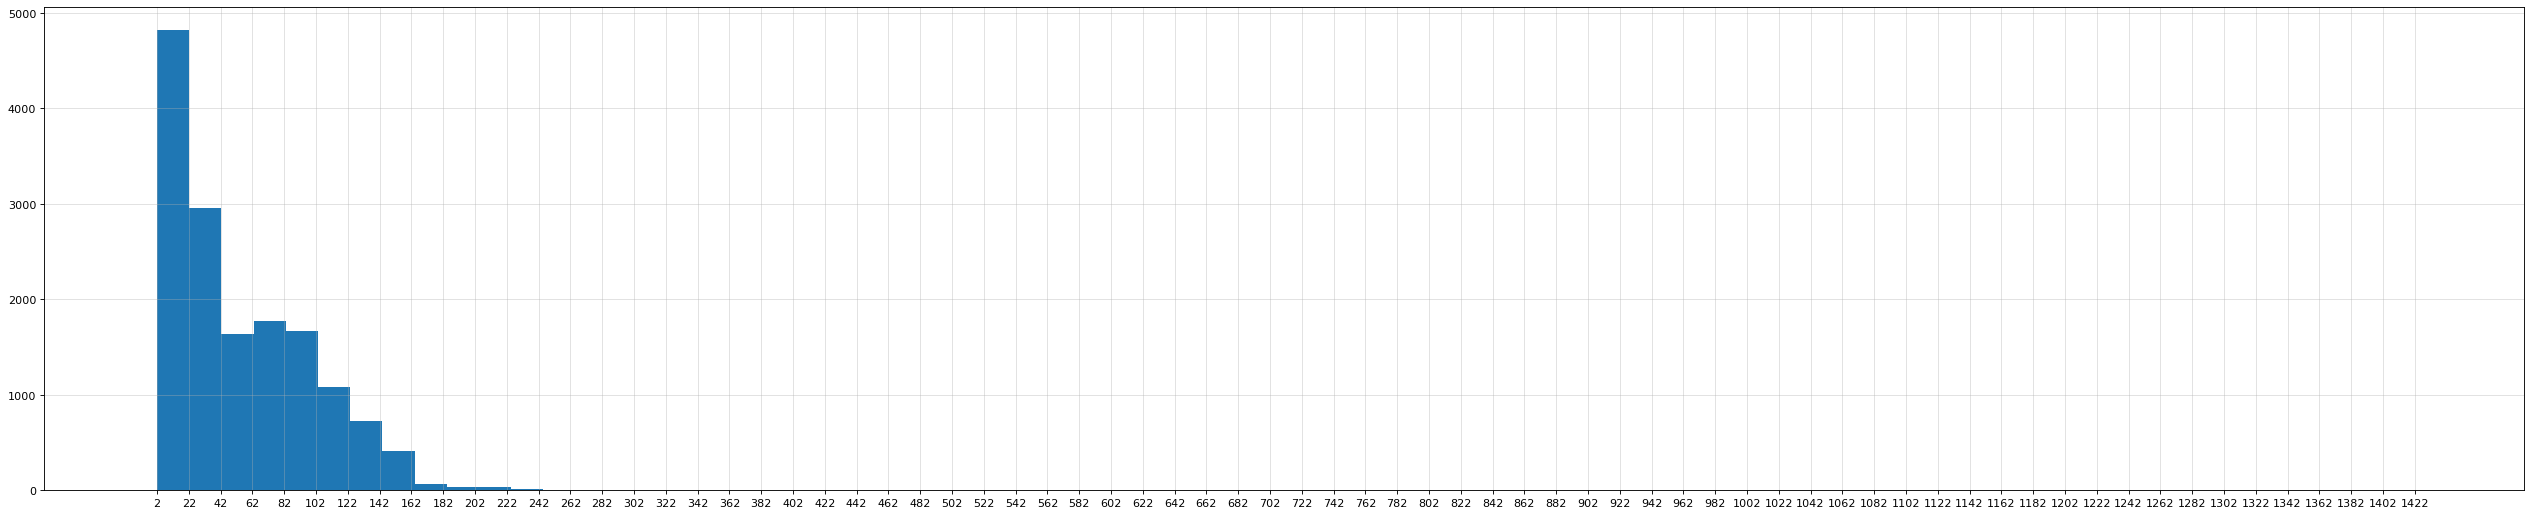

In [17]:
a = width_list
# 计算组数
d = 20  # 组距
num_bins = (max(a)-min(a))//d
# 设置图形大小
plt.figure(figsize=(40, 8), dpi=80)
plt.hist(a, num_bins)
# 设置x轴刻度
plt.xticks(range(min(a), max(a)+d, d))
# 设置网格
plt.grid(alpha=0.4)
plt.show()

In [18]:
print(min(width_list))
print(width_list.count(0))

2
0


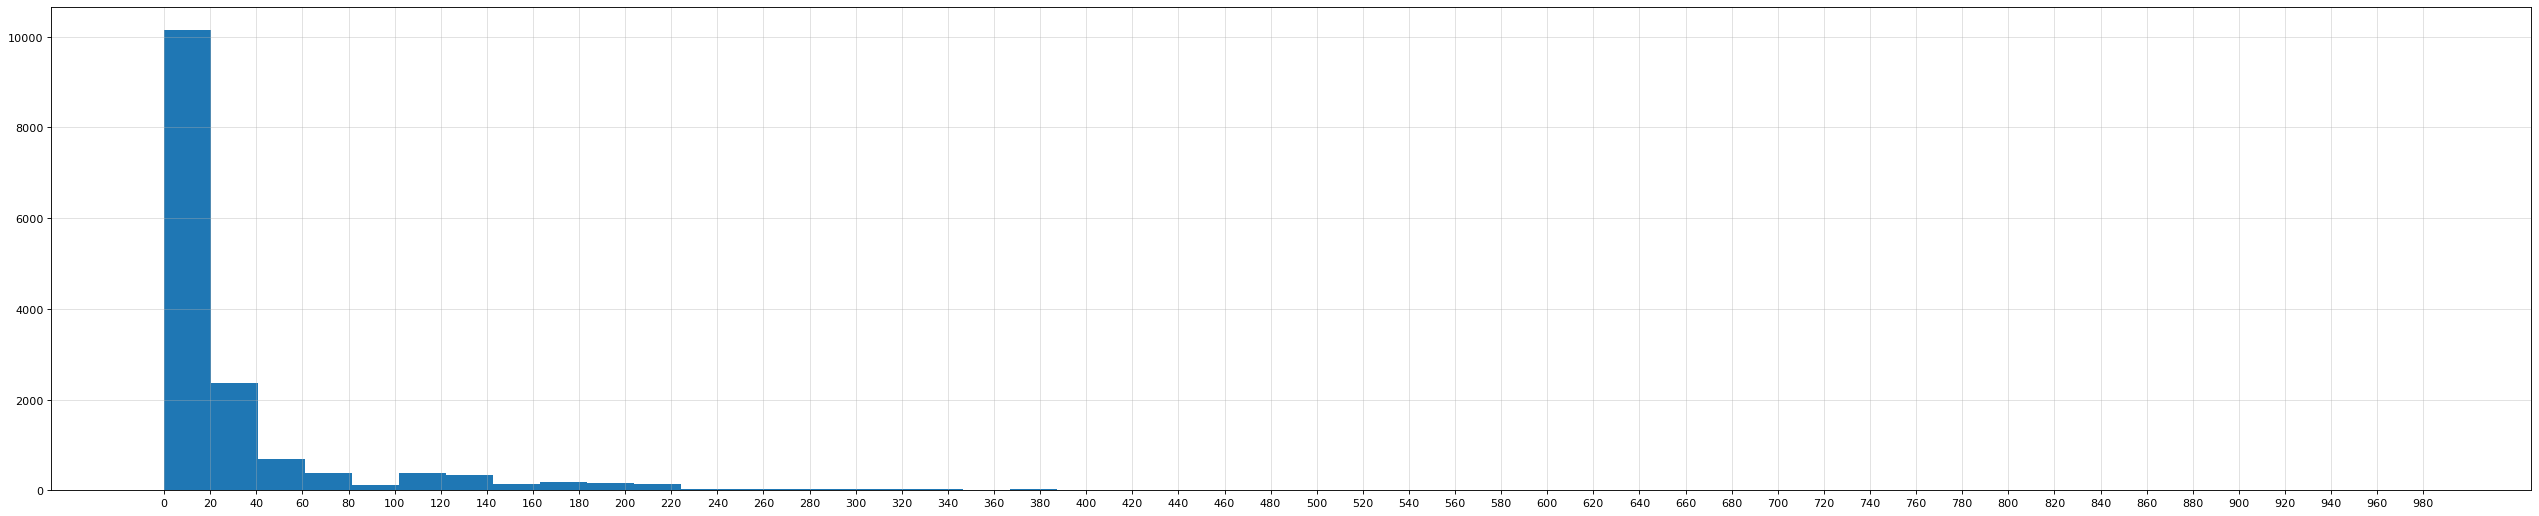

In [19]:
a = height_list
# 计算组数
d = 20  # 组距
num_bins = (max(a)-min(a))//d
# 设置图形大小
plt.figure(figsize=(40, 8), dpi=80)
plt.hist(a, num_bins)
# 设置x轴刻度
plt.xticks(range(min(a), max(a)+d, d))
# 设置网格
plt.grid(alpha=0.4)
plt.show()

In [20]:
print(min(height_list))
print(height_list.count(0))

0
1


In [21]:
print(min(area_list),max(area_list))

0 1107140


In [22]:
import numpy as np

In [23]:
upper = np.quantile(area_list, 0.9)
new_area_list = area_list
i = 0
while i < len(new_area_list):
    if new_area_list[i] > upper:
        new_area_list.pop(i)
    else:
        i += 1

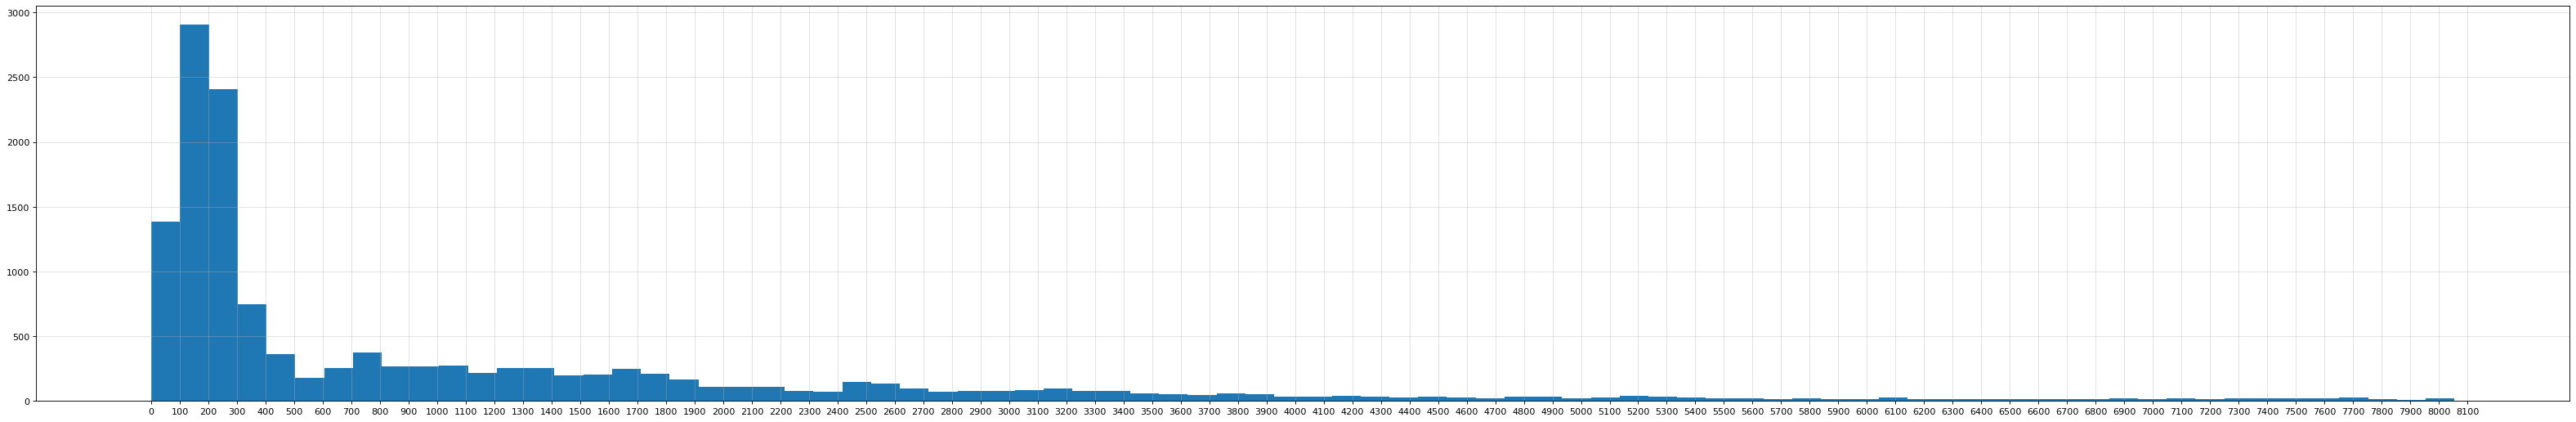

In [24]:
a = new_area_list
# 计算组数
d = 100  # 组距
num_bins = (max(a)-min(a))//d
# 设置图形大小
plt.figure(figsize=(50, 8), dpi=80)
plt.hist(a, num_bins)
# 设置x轴刻度
plt.xticks(range(min(a), max(a)+d, d))
# 设置网格
plt.grid(alpha=0.4)
plt.show()